In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('../data/diabetes.csv')
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-4.524887e-12,-1.402715e-10,1.131222e-11,-2.941177e-11,-2.511817e-19,-6.334842e-11,-1.255908e-19,-1.809955e-11,2.262444e-12,-2.036199e-11,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [3]:
values = df.to_numpy()
x = values[:, 0:10]
y = values[:, 10]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(x_train)
normalized_x_train = scaler.transform(x_train)
normalized_x_test = scaler.transform(x_test)

In [4]:
linear_reg = LinearRegression()
linear_reg.fit(normalized_x_train, y_train)
lr_y_predict = linear_reg.predict(normalized_x_test)
print('linear regression mean squared error is:', mean_squared_error(y_test, lr_y_predict))
df_lr = pd.DataFrame(normalized_x_test)
df_lr['target'] = y_test
df_lr['predict'] = lr_y_predict
df_lr

linear regression mean squared error is: 2900.1732824742035


,0,1,2,3,4,5,6,7,8,9,target,predict
0,0.948794,-0.942179,-0.168225,-0.354929,2.631586,2.649166,0.429487,0.711038,0.653621,-0.147186,219.0,139.548314
1,1.969426,-0.942179,0.745015,0.427541,-0.511434,-0.333282,0.037631,-0.835458,-0.496817,-0.490134,70.0,179.520306
2,1.341345,1.061370,-0.122563,-0.283796,2.170225,1.042726,1.213198,-0.062210,1.743689,-0.404397,202.0,134.041333
3,2.047936,-0.942179,1.064649,1.613101,1.160999,0.785959,-1.608162,2.953457,2.039982,1.224607,230.0,291.411936
4,0.242203,1.061370,-0.465028,-0.070395,0.814978,1.134899,-0.119111,0.711038,-0.133192,-0.232923,111.0,123.787236
...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.006672,-0.942179,-1.423930,-0.141528,-0.136578,-0.392536,0.899714,-0.835458,-0.094633,0.110025,153.0,115.009745
85,0.242203,-0.942179,-0.579183,-0.852865,-0.626774,-0.932406,1.683425,-1.608706,-1.535675,0.195762,98.0,78.958868
86,-0.621409,-0.942179,-1.378268,-1.066265,-1.866681,-2.176738,1.134827,-1.608706,-1.201279,-1.433242,37.0,81.557314
87,-0.542899,-0.942179,-1.515254,-1.350800,-1.232310,-1.044330,0.429487,-0.835458,-1.891794,-1.090294,63.0,54.377479


In [5]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(normalized_x_train, y_train)
knnr_y_predict = knn.predict(normalized_x_test)
print('knn regression mean squared error is:', mean_squared_error(y_test, knnr_y_predict))
df_knnr = pd.DataFrame(normalized_x_test)
df_knnr['target'] = y_test
df_knnr['predict'] = knnr_y_predict
df_knnr

knn regression mean squared error is: 8385.516853932584


,0,1,2,3,4,5,6,7,8,9,target,predict
0,0.948794,-0.942179,-0.168225,-0.354929,2.631586,2.649166,0.429487,0.711038,0.653621,-0.147186,219.0,67.0
1,1.969426,-0.942179,0.745015,0.427541,-0.511434,-0.333282,0.037631,-0.835458,-0.496817,-0.490134,70.0,52.0
2,1.341345,1.061370,-0.122563,-0.283796,2.170225,1.042726,1.213198,-0.062210,1.743689,-0.404397,202.0,69.0
3,2.047936,-0.942179,1.064649,1.613101,1.160999,0.785959,-1.608162,2.953457,2.039982,1.224607,230.0,248.0
4,0.242203,1.061370,-0.465028,-0.070395,0.814978,1.134899,-0.119111,0.711038,-0.133192,-0.232923,111.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.006672,-0.942179,-1.423930,-0.141528,-0.136578,-0.392536,0.899714,-0.835458,-0.094633,0.110025,153.0,49.0
85,0.242203,-0.942179,-0.579183,-0.852865,-0.626774,-0.932406,1.683425,-1.608706,-1.535675,0.195762,98.0,59.0
86,-0.621409,-0.942179,-1.378268,-1.066265,-1.866681,-2.176738,1.134827,-1.608706,-1.201279,-1.433242,37.0,59.0
87,-0.542899,-0.942179,-1.515254,-1.350800,-1.232310,-1.044330,0.429487,-0.835458,-1.891794,-1.090294,63.0,31.0


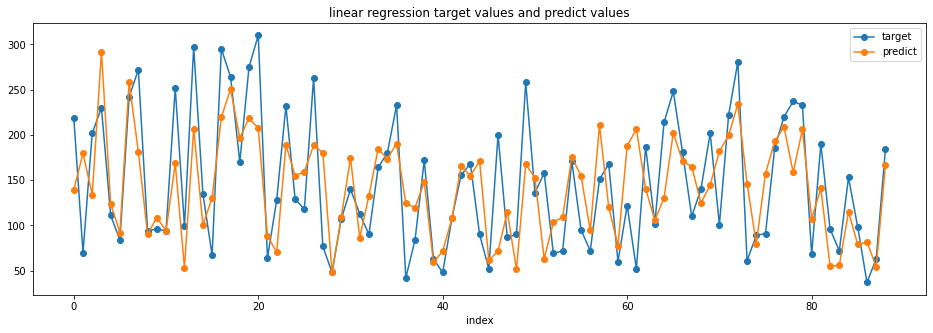

In [6]:
labels = ['target', 'predict']
plt.figure(figsize=(16, 5))

plt.plot(y_test, 'o-')
plt.plot(lr_y_predict, 'o-')
plt.legend(labels=labels)
plt.title('linear regression target values and predict values')
plt.xlabel('index')

plt.show()

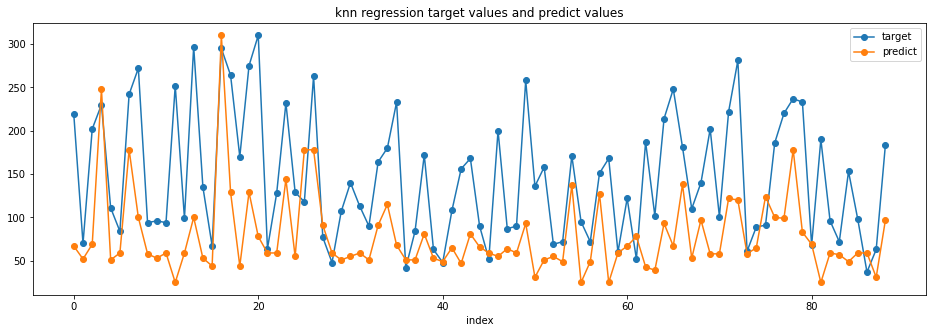

In [7]:
plt.figure(figsize=(16, 5))

plt.plot(y_test, 'o-')
plt.plot(knnr_y_predict, 'o-')
plt.legend(labels=labels)
plt.title('knn regression target values and predict values')
plt.xlabel('index')

plt.show()